# Description of the breast lesion deep learning project

## Motivation and notes

## Publications data sources

Al-Dhabyani, W., Gomaa, M., Khaled, H., & Fahmy, A. (2019). Dataset of breast ultrasound images. Data in brief, 28, 104863. https://doi.org/10.1016/j.dib.2019.104863

Pawłowska, A., Ćwierz-Pieńkowska, A., Domalik, A., Jaguś, D., Kasprzak, P., Matkowski, R., Fura, Ł., Nowicki, A., & Zolek, N. (2024). A Curated Benchmark Dataset for Ultrasound Based Breast Lesion Analysis (Breast-Lesions-USG) (Version 1) [dataset]. The Cancer Imaging Archive. https://doi.org/10.7937/9WKK-Q141

**the following data is not included yet**

A. Abbasian Ardakani, A. Mohammadi, M. Mirza-Aghazadeh-Attari, U.R. Acharya, An open-access breast lesion ultrasound image database‏: Applicable in artificial intelligence studies, Computers in Biology and Medicine, 152 (2023) 106438. https://doi.org/10.1016/j.compbiomed.2022.106438



In [ ]:
url4 = "https://qamebi.com/wp-content/uploads/2022/11/Benign.zip" #image, mask and masked image file .bmp files?
url5 = "https://qamebi.com/wp-content/uploads/2022/11/Malignant.zip"

# Loading and organizing data

In [15]:
import os
import shutil
import requests
from zipfile import ZipFile
from tqdm import tqdm

url1 = "https://scholar.cu.edu.eg/Dataset_BUSI.zip"
url2 = "https://www.cancerimagingarchive.net/wp-content/uploads/BrEaST-Lesions_USG-images_and_masks-Dec-15-2023.zip"
url3 = "https://www.cancerimagingarchive.net/wp-content/uploads/BrEaST-Lesions-USG-clinical-data-Dec-15-2023.xlsx"
data_dir = "data"

os.makedirs(data_dir, exist_ok=True)  # only created if does not exist

response1 = requests.get(url1, stream=True, verify=False)
zip_file_path1 = os.path.join(data_dir, "Dataset_BUSI.zip")
with open(zip_file_path1, "wb") as zip_file:
    total_size = int(response1.headers.get('content-length', 0))
    with tqdm(total=total_size, unit='B', unit_scale=True, desc=os.path.basename(zip_file_path1)) as pbar:
        for data in response1.iter_content(chunk_size=1024):
            pbar.update(len(data))
            zip_file.write(data)

with ZipFile(zip_file_path1, "r") as zip_ref:
    zip_ref.extractall(data_dir)

# put images into one directory
target_directory = os.path.join(data_dir, "Dataset_BUSI_with_GT")
os.makedirs(target_directory, exist_ok=True)
source_extracted_folder = os.path.join(data_dir, "Dataset_BUSI_with_GT")
categories = ['benign', 'malignant', 'normal']
for category in categories:
    subfolder_path = os.path.join(source_extracted_folder, category)
    for file in os.listdir(subfolder_path):
        src_path = os.path.join(subfolder_path, file)
        dest_path = os.path.join(target_directory, file)
        shutil.move(src_path, dest_path)
    os.rmdir(subfolder_path)

os.remove(zip_file_path1)

response2 = requests.get(url2, stream=True, verify=False)
zip_file_path2 = os.path.join(data_dir, "BrEaST-Lesions_USG-images_and_masks-Dec-15-2023.zip")
with open(zip_file_path2, "wb") as zip_file:
    total_size = int(response2.headers.get('content-length', 0))
    with tqdm(total=total_size, unit='B', unit_scale=True, desc=os.path.basename(zip_file_path2)) as pbar:
        for data in response2.iter_content(chunk_size=1024):
            pbar.update(len(data))
            zip_file.write(data)

with ZipFile(zip_file_path2, "r") as zip_ref:
    zip_ref.extractall(data_dir)

os.remove(zip_file_path2)

response3 = requests.get(url3, stream=True, verify=False)
file_path3 = os.path.join(data_dir, "BrEaST-Lesions-USG-clinical-data-Dec-15-2023.xlsx")
with open(file_path3, "wb") as file:
    total_size = int(response3.headers.get('content-length', 0))
    with tqdm(total=total_size, unit='B', unit_scale=True, desc=os.path.basename(file_path3)) as pbar:
        for data in response3.iter_content(chunk_size=1024):
            pbar.update(len(data))
            file.write(data)

print("Done and saved to:", data_dir)

/Users/KT/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'scholar.cu.edu.eg'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
Dataset_BUSI.zip: 100%|███████████████████████| 206M/206M [05:31<00:00, 621kB/s]
/Users/KT/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.cancerimagingarchive.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
BrEaST-Lesions_USG-images_and_masks-Dec-15-2023.zip: 100%|█| 69.9M/69.9M [00:12<
/Users/KT/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: 

Done and saved to: data


In [18]:
import numpy as np
import pandas as pd
from PIL import Image

# Paths
source_directory1 = 'data/BrEaST-Lesions_USG-images_and_masks'
source_directory2 = 'data/Dataset_BUSI_with_GT'
excel_path = 'data/BrEaST-Lesions-USG-clinical-data-Dec-15-2023.xlsx'
target_directory = 'data/Ordered_images/' #make dir if does not exist!


# Load from Excel
df = pd.read_excel(excel_path, engine='openpyxl')
df_filtered = df[df['Classification'].str.lower() != 'normal']

# Create target directories for classes
for cls in df_filtered['Classification'].unique():
    class_dir = os.path.join(target_directory, cls)
    if not os.path.exists(class_dir):
        os.makedirs(class_dir)

def apply_mask_and_save(image_path, mask_path, save_path):
    image = Image.open(image_path).convert("L")
    mask = Image.open(mask_path).convert("L")
    image_array = np.array(image)
    mask_array = np.array(mask)
    image_array[mask_array == 0] = 0
    masked_image = Image.fromarray(image_array)
    masked_image.save(save_path)

# Organize images and masks from the first directory
data_records = []
for _, row in df_filtered.iterrows():
    image_filename = row['Image_filename']
    mask_filename = row['Mask_tumor_filename']
    classification = row['Classification'].strip()
    image_path = os.path.join(source_directory1, image_filename)
    mask_path = os.path.join(source_directory1, mask_filename)
    save_path = os.path.join(target_directory, classification, image_filename)
    if os.path.exists(image_path) and os.path.exists(mask_path):
        apply_mask_and_save(image_path, mask_path, save_path)
    data_records.append({'filename': image_filename, 'classification': classification})

# process images from the second directory
for entry in os.listdir(source_directory2):
    if entry.endswith('.png') and not '_mask' in entry:
        base_name = entry[:-4]  # remove ".png"
        mask_filename = f"{base_name}_mask.png"
        full_image_path = os.path.join(source_directory2, entry)
        full_mask_path = os.path.join(source_directory2, mask_filename)
        if os.path.exists(full_mask_path):  # check if mask exists
            classification = 'benign' if 'benign' in base_name else 'malignant'
            save_path = os.path.join(target_directory, classification, entry)
            apply_mask_and_save(full_image_path, full_mask_path, save_path)
            data_records.append({'filename': entry, 'classification': classification})

# combine all into df
combined_df = pd.DataFrame(data_records)
combined_df.head()

Images and masks have been organized and processed!


# Data exploration 

## Plotting example images

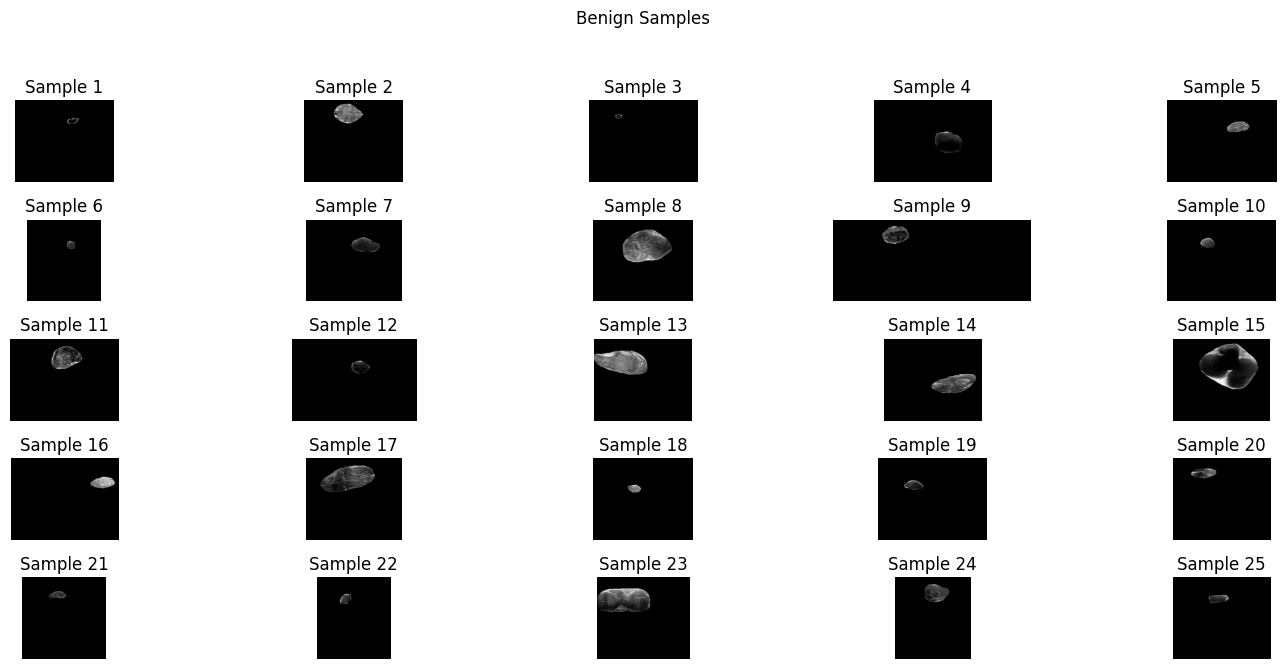

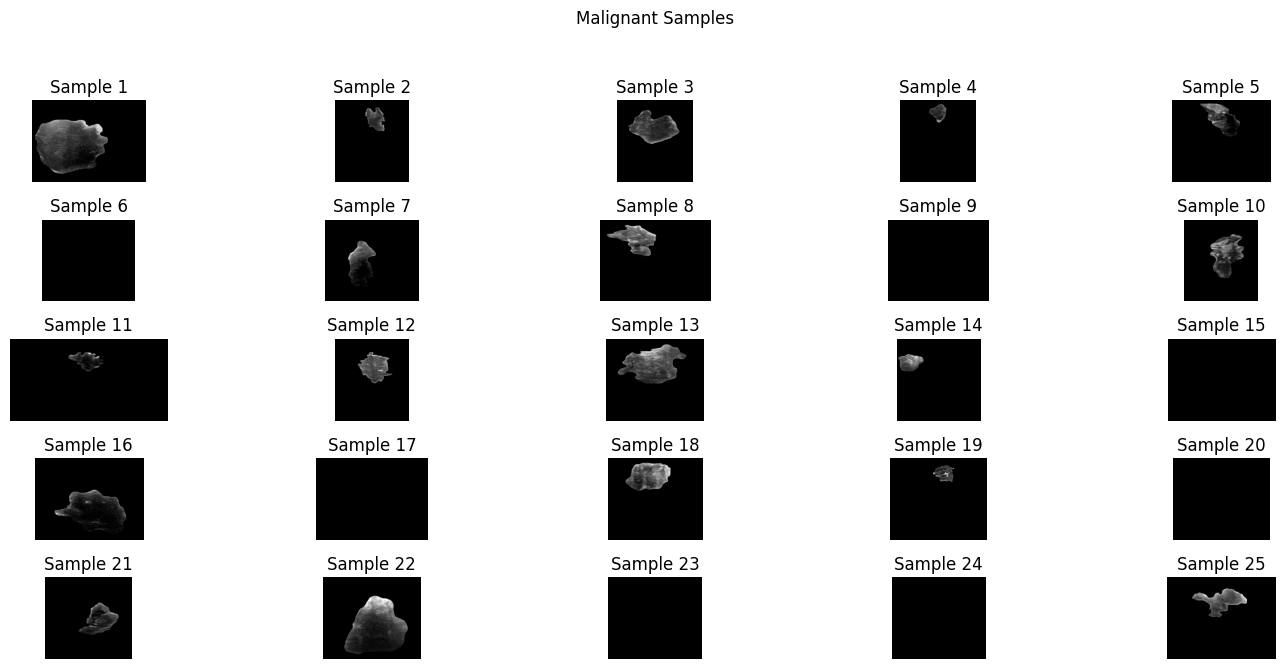

In [3]:
import matplotlib.pyplot as plt
import os
from PIL import Image

def plot_class_samples(base_path, class_name, num_samples=10):
    plt.figure(figsize=(15, 7))
    class_folder = os.path.join(base_path, class_name)
    image_files = [os.path.join(class_folder, f) for f in os.listdir(class_folder) if f.endswith('.png')]

    for i in range(min(num_samples, len(image_files))):
        img_path = image_files[i]
        img = Image.open(img_path).convert('L')  # Load in grayscale
        ax = plt.subplot(5, 5, i + 1)  # Adjust subplot grid for 10 images: 2 rows and 5 columns
        ax.imshow(img, cmap='gray')
        ax.set_title(f"Sample {i + 1}")
        ax.axis('off')

    plt.suptitle(f"{class_name.capitalize()} Samples")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

base_path = 'data/Ordered_images/'

plot_class_samples(base_path, 'benign', num_samples=25)

plot_class_samples(base_path, 'malignant', num_samples=25)

## Is there a class imbalance? 

In [20]:
combined_df['classification'].value_counts()

benign       591
malignant    441
Name: classification, dtype: int64

# Model building

## Loading data with keras.preprocessing function (tip from Vlad)

In [7]:
import tensorflow as tf

base_path = 'data/Ordered_images/'

# parameters for the dataset generation
batch_size = 32
img_height = 180  # what should the input size be? #224
img_width = 180   # ?

# Create training dataset from directory
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    base_path,
    labels='inferred',
    label_mode='int',   # Labels are returned as integers
    class_names=['benign', 'malignant'], # class names
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=(img_height, img_width),  # resize images to the specified size
    shuffle=True,        # shuffles the data
    seed=123,            # seed for shuffling and transformations
    validation_split=0.2,  # image proportion for validation
    subset='training',
)

# Crreating validation set
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    base_path,
    labels='inferred',
    label_mode='int',
    class_names=['benign', 'malignant'],
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation',
)

Found 1032 files belonging to 2 classes.
Using 826 files for training.
Found 1032 files belonging to 2 classes.
Using 206 files for validation.


In [6]:
print(images.shape)
print(labels.shape)

(32, 180, 180, 1)
(32,)


## Data preprocessing and augmentation 

## Edge detection: is it true that benign lesions are rather round and malignant ones are rather irregularly shaped? 

## Inspect Preprocessed Images?

## Baseline model